<a href="https://colab.research.google.com/github/aveens13/ML-Projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
file_data = files.upload()
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c digit-recognizer
import zipfile
z = zipfile.ZipFile('digit-recognizer.zip')
z.extractall()

 98% 15.0M/15.3M [00:01<00:00, 22.1MB/s]
100% 15.3M/15.3M [00:01<00:00, 13.0MB/s]


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
data = np.array(train)
m, n = data.shape 
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_Train = data_train[0]
X_Train = data_train[1:n] 
X_Train = X_Train / 255
_, m_train = X_Train.shape

In [ ]:
def init_params():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A =  np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+ 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)

  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1, b1, W2, b2

def get_predictions(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y ) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 10 == 0):
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y ))
  
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_Train, Y_Train, 500, 0.1)

Iteration:  0
[5 5 5 ... 5 6 6] [4 9 9 ... 4 9 7]
Accuracy:  0.08585365853658537
Iteration:  10
[5 7 7 ... 5 0 7] [4 9 9 ... 4 9 7]
Accuracy:  0.19607317073170732
Iteration:  20
[4 7 2 ... 4 0 7] [4 9 9 ... 4 9 7]
Accuracy:  0.27090243902439026
Iteration:  30
[4 7 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.3353658536585366
Iteration:  40
[4 4 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.3961219512195122
Iteration:  50
[4 4 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.45758536585365855
Iteration:  60
[4 4 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.5178780487804878
Iteration:  70
[4 4 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.5648536585365853
Iteration:  80
[6 4 2 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.6020243902439024
Iteration:  90
[6 4 9 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.6316341463414634
Iteration:  100
[6 4 9 ... 4 7 7] [4 9 9 ... 4 9 7]
Accuracy:  0.6559024390243903
Iteration:  110
[6 4 9 ... 4 9 7] [4 9 9 ... 4 9 7]
Accuracy:  0.6785365853658537
Iteration:  120
[6 4 9 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_Train[:, index, None]
    prediction = make_predictions(X_Train[:, index, None], W1, b1, W2, b2)
    label = Y_Train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


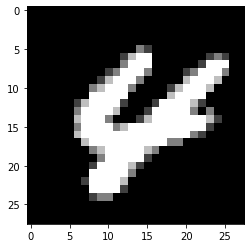

Prediction:  [4]
Label:  9


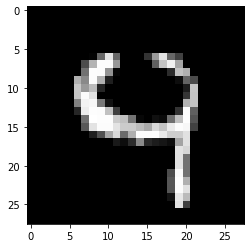

Prediction:  [9]
Label:  9


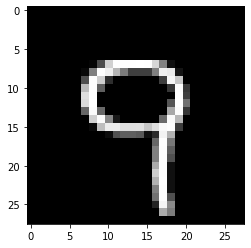

Prediction:  [5]
Label:  5


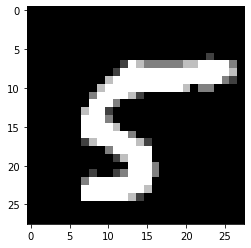

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

This is a simple neural network which is guided through Samson Zhang from youtube and whole work is his and this is for understanding the hello world of AI.